# NLP Disaster Tweets Classification

## Project Introduction

Natural disasters pose a serious threat to human life and infrastructure. During such events, platforms like Twitter become hubs of real-time information sharing. However, the massive influx of tweets makes it difficult to distinguish between tweets reporting actual disasters and those that do not. This project aims to leverage Natural Language Processing (NLP) to build a classifier that can identify tweets referring to real disaster events.

## Dataset Overview

The dataset comes from the [Kaggle NLP with Disaster Tweets competition](https://www.kaggle.com/competitions/nlp-getting-started), and contains:

- **Training Set:** 7,613 tweets with binary labels:
  - `1`: Tweet describes a real disaster
  - `0`: Tweet does not describe a real disaster
- **Test Set:** 3,263 tweets (unlabeled)
- **Columns:**
  - `id`: Unique tweet identifier
  - `keyword`: Disaster-related keyword (may be missing)
  - `location`: Tweet location (may be missing)
  - `text`: Raw tweet content
  - `target`: Label indicating real disaster (1) or not (0) — only in training data

The dataset includes informal language, abbreviations, and missing data, requiring extensive text preprocessing.

## Project Objective

The objective is to build a deep learning-based text classifier capable of identifying disaster-related tweets. This involves:

- Cleaning and preprocessing tweet text
- Exploring and visualizing patterns in the data
- Converting text to numerical representations using tokenization and embeddings
- Training a sequential neural network (With RNN,GRU snd LSTM layers)
- Evaluating model performance using appropriate classification metrics
- Highlighting possible real-world applications in disaster response and information filtering



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_path=r'/content/drive/MyDrive/Colab Notebooks/nlp-getting-started/train.csv'
test_path=r'/content/drive/MyDrive/Colab Notebooks/nlp-getting-started/test.csv'

In [3]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(train_path)

In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
#Statistical Analysis
print(f'Data Shape: {data.shape}')
print(f'Data Columns: {data.columns}')
print(f'Data Info: {data.info()}')
print(f'Data Describe: {data.describe()}')

Data Shape: (7613, 5)
Data Columns: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
Data Info: None
Data Describe:                  id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


# Data Preprocessing and Exploratory Analysis

## Overview

The preprocessing phase began by removing duplicate records to ensure data quality. We then conducted several exploratory visualizations to understand the structure and distribution of the dataset:

- **Class Distribution Bar Plot**: Displayed the balance between disaster (`target=1`) and non-disaster (`target=0`) tweets.
- **Keyword Countplot**: Visualized the frequency of disaster-related keywords, offering insight into the most common terms across tweets.
- **Tweet Length Distribution**: Compared the number of words per tweet for each target class to observe linguistic differences.
- **Location-wise Distribution**: Plotted the most frequent locations associated with tweets to examine geographical trends.



In [8]:
print(data['text'].duplicated().sum())
data=data.drop_duplicates('text')


110


/tmp/ipython-input-11-4154575225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['target'].value_counts().index,y=data['target'].value_counts(),palette='viridis')


<Axes: xlabel='target', ylabel='count'>

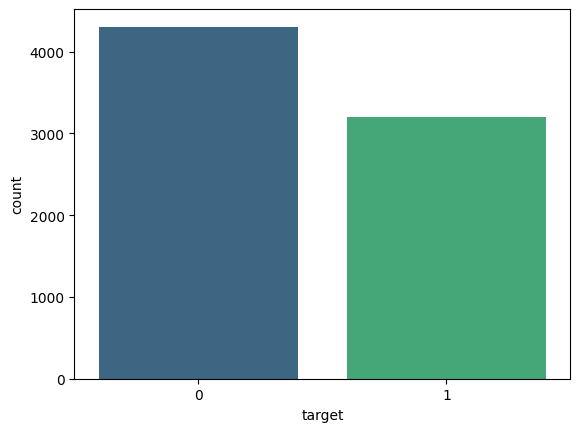

In [11]:
sns.barplot(x=data['target'].value_counts().index,y=data['target'].value_counts(),palette='viridis')

<Axes: xlabel='count', ylabel='keyword'>

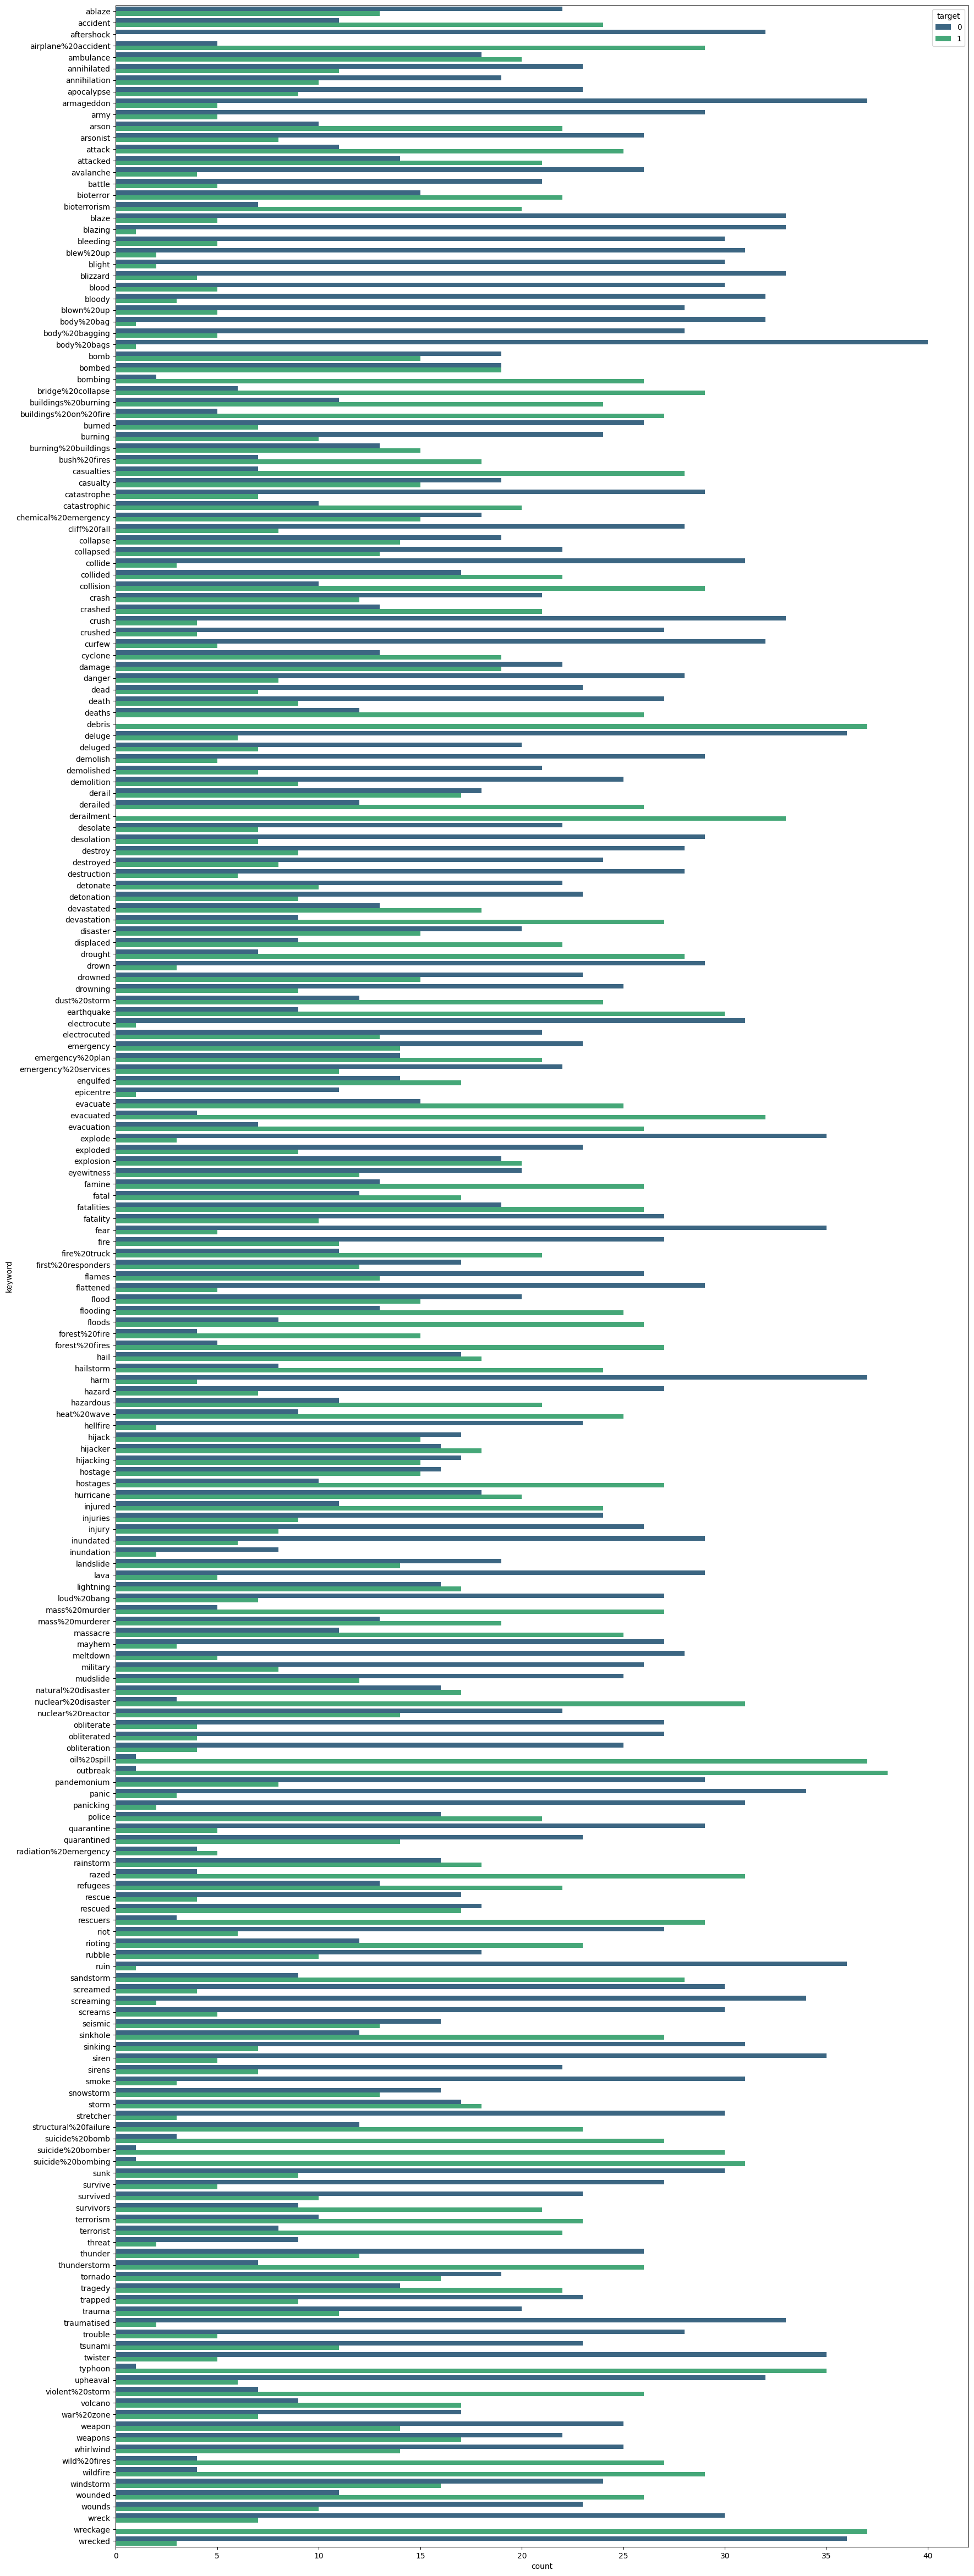

In [12]:
#Visualization of how the keywords are distributed among the two different target values
plt.figure(figsize=(20,60))
sns.countplot(y='keyword',hue='target',data=data,palette='viridis')

<Axes: ylabel='keyword'>

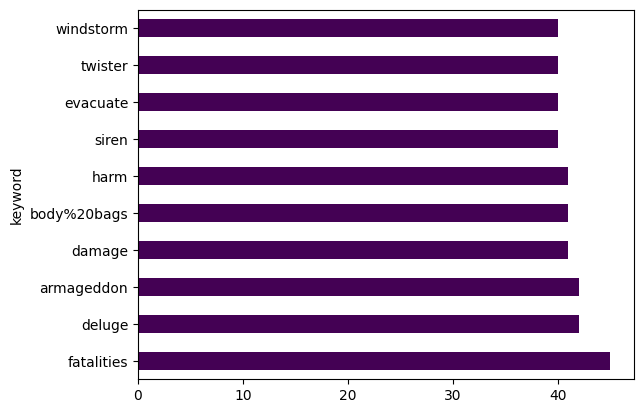

In [13]:
#keywords that appear most frequently
data['keyword'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh',colormap='viridis')

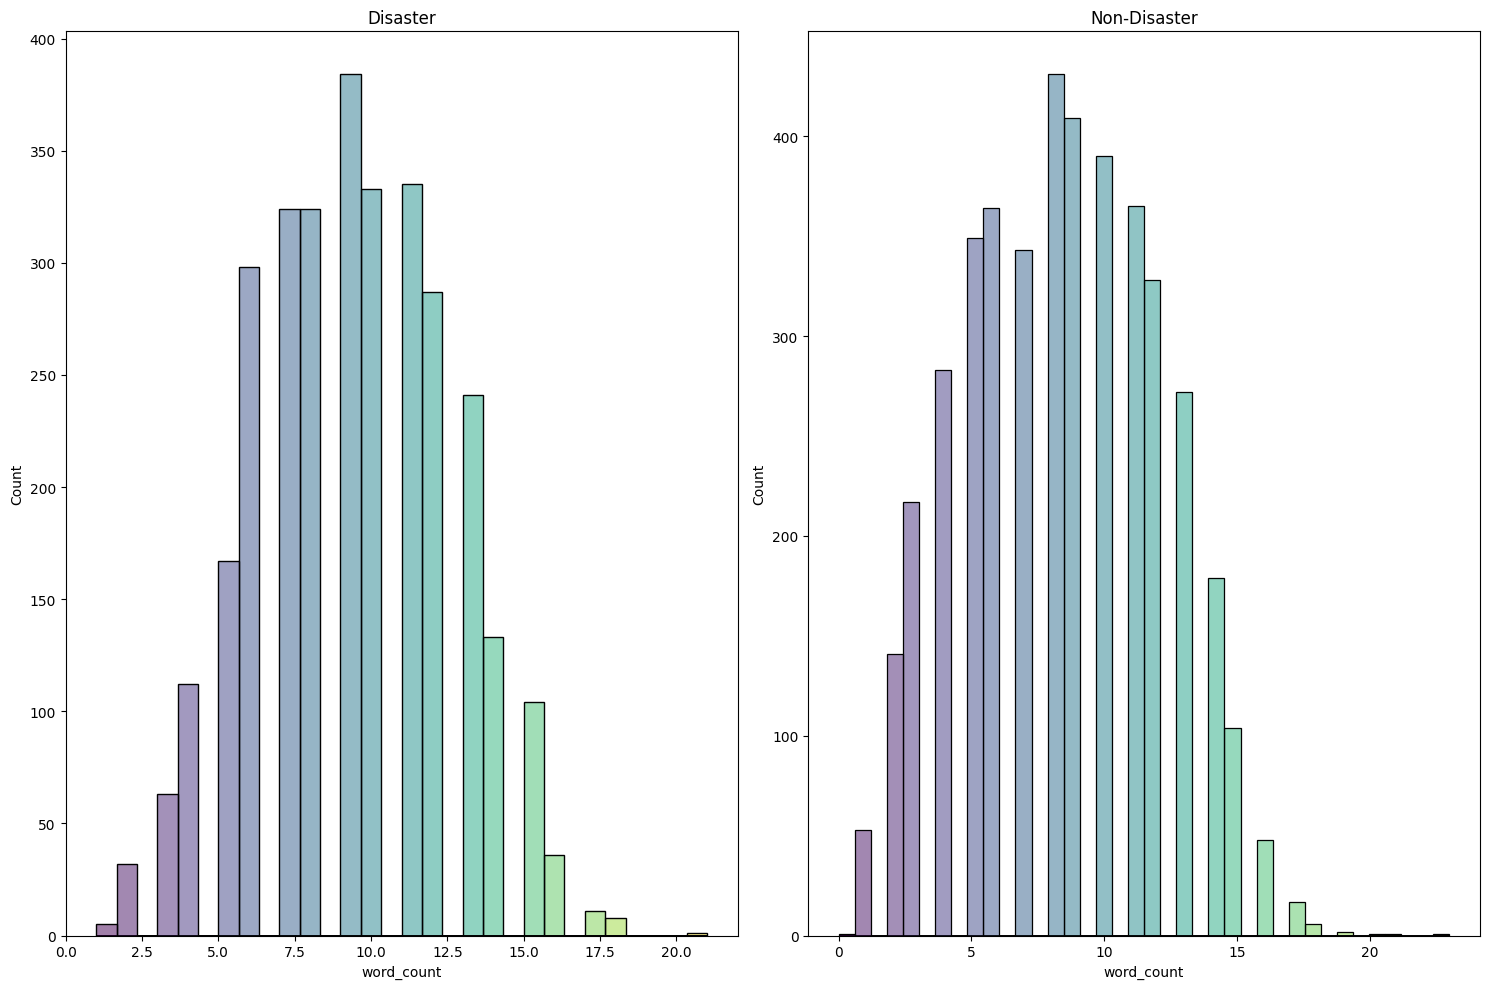

In [68]:
#None of words per sentence
fig,axes=plt.subplots(1,2,figsize=(15,10))
data['word_count']=data['text'].apply(lambda x: len(x.split()))
sns.histplot(x='word_count',data=data[data['target']==1], hue='word_count',ax=axes[0],palette='viridis',legend=False)
sns.histplot(x='word_count',data=data[data['target']==0], hue='word_count',ax=axes[1],palette='viridis',legend=False)

axes[0].set_title('Disaster')
axes[1].set_title('Non-Disaster')
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-3974159046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=location_0.index.get_level_values('location'),x=location_0.values,palette='viridis',ax=axes[0])
/tmp/ipython-input-15-3974159046.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=location_1.index.get_level_values('location'),x=location_1.values,palette='viridis',ax=axes[1])


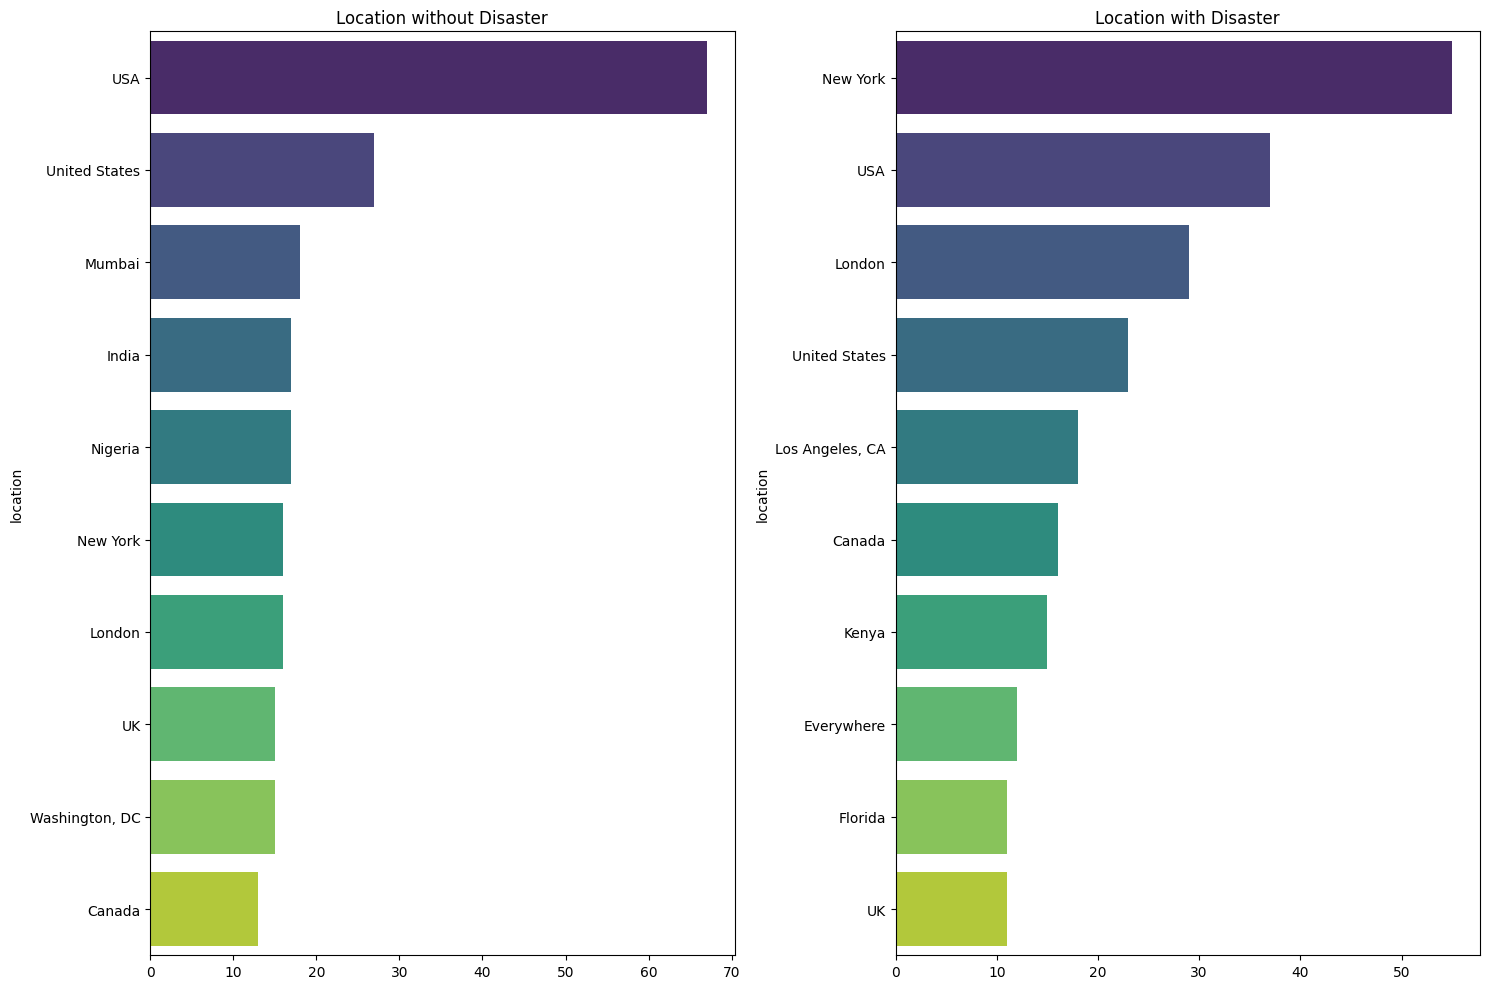

In [15]:
#Location wise Disasters
data['location']=data['location'].replace('M!$$!$$!PP!','Mississippi')
location_0=data[data['target']==1].groupby('location')['target'].value_counts().sort_values(ascending=False).head(10)
location_1=data[data['target']==0].groupby('location')['target'].value_counts().sort_values(ascending=False).head(10)

fig,axes=plt.subplots(1,2,figsize=(15,10))

sns.barplot(y=location_0.index.get_level_values('location'),x=location_0.values,palette='viridis',ax=axes[0])
axes[0].set_title('Location without Disaster')
sns.barplot(y=location_1.index.get_level_values('location'),x=location_1.values,palette='viridis',ax=axes[1])
axes[1].set_title('Location with Disaster')
plt.tight_layout()
plt.show()

## Summary

- The dataset has a moderate class imbalance, with slightly more non-disaster tweets than disaster ones.
- Certain keywords (e.g., "fire", "earthquake") occur frequently and are strongly associated with disaster-labeled tweets.
- Tweets related to real disasters tend to be slightly longer on average, possibly due to more descriptive language.
- Location data is sparse and unevenly distributed, but a few locations show high tweet counts, which could be leveraged as weak signals.

These insights help guide feature engineering decisions and model expectations moving forward.


# Data Cleaning

To prepare the tweet text for modeling, we applied a comprehensive data cleaning pipeline. This step is crucial for reducing noise, standardizing inputs, and improving the quality of features extracted from the text. The following transformations were applied:

- **Lowercasing**: All text converted to lowercase to ensure uniformity.
- **Removal of Noise**:
  - Square brackets and their contents
  - URLs and HTML tags
  - Punctuation, newline characters, and words containing numbers
- **Contraction Expansion**: Converted contractions to full forms (e.g., *don't* → *do not*).
- **Emoji Conversion**: Emojis were replaced with descriptive text labels to preserve sentiment signals.
- **Tokenization**: Split sentences into individual words using NLTK's `word_tokenize`.
- **Stopword Removal**: Eliminated common English stopwords that do not contribute meaningful information.
- **Lemmatization**: Reduced words to their base forms using WordNet lemmatizer.

The final cleaned text was reconstructed from the filtered tokens and used as input for vectorization and modeling.


In [16]:
import re
import string
import contractions
import emoji
import nltk

# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer once (not inside function)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    '''Clean text by lowercasing, removing brackets, links, punctuation, numbers, stopwords, emojis, contractions, and lemmatizing.'''

    # Lowercase
    text = text.lower()

    # Remove square brackets, URLs, HTML tags, punctuation, line breaks, words with numbers
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)

    # Expand contractions (e.g., don't → do not)
    text = contractions.fix(text)

    # Convert emojis to text (e.g., 😊 → :smiling_face_with_smiling_eyes:)
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join back into string
    return " ".join(tokens)


data['text'] = data['text'].apply(lambda x:clean_text(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
data['text'].head()

,text
0,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive wildfire evacuation order calif...
4,got sent photo ruby alaska smoke wildfire pour...


# Tokenization and Embedding Matrix Generation

To prepare textual data for input into a deep learning model, we performed tokenization followed by embedding initialization using GloVe — a widely used pre-trained word embedding model.

## What is GloVe?

GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm developed by Stanford for obtaining vector representations of words. It combines the advantages of global matrix factorization methods (like LSA) and local context window methods (like Word2Vec). GloVe embeddings are trained on aggregated word co-occurrence statistics from large corpora (e.g., Wikipedia, Common Crawl), resulting in dense vector representations that capture semantic relationships — such as *king - man + woman ≈ queen*.

In this project, we use the `glove.6B.100d.txt` variant, which contains 100-dimensional embeddings trained on 6 billion tokens from Wikipedia and Gigaword.

## Tokenization

We used Keras' `Tokenizer` to:

- Fit on the training text to build a word index based on frequency.
- Convert each tweet into a sequence of integers representing word indices.
- Limit the vocabulary size and handle out-of-vocabulary tokens using a special OOV marker.
- Pad all sequences to a fixed length to ensure uniform input shape.

## Embedding Matrix Construction

We constructed an embedding matrix as follows:

- For each word in the tokenizer’s vocabulary, we retrieved its corresponding vector from the GloVe file.
- If the word was found in GloVe, its vector was placed in the embedding matrix at the index corresponding to that word.
- Words not found in GloVe were assigned zero vectors.
- The final embedding matrix was used to initialize a non-trainable `Embedding` layer in the Keras model, allowing the model to leverage semantic information encoded in GloVe during training.

This approach enhances the model’s ability to understand word relationships, especially in cases where the training data is limited.


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
sequences=tokenizer.texts_to_sequences(data['text'])
word_index=tokenizer.word_index


In [20]:
max_length=23
sequences=pad_sequences(sequences,maxlen=max_length ,padding='post')

In [21]:
glove_file_path=r'/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt'

embeddings_index = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


In [23]:
embedding_matrix=np.zeros((len(word_index)+1,100))

for i,word in enumerate(word_index):

  embedding_vector=embeddings_index.get(word)

  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

print(embedding_matrix.shape)

(15166, 100)


In [24]:
# Train test split
from keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(sequences, data['target'], test_size=0.2, random_state=42)

# Model Architecture and Training

To evaluate the performance of different recurrent neural network variants, we implemented and trained the following deep learning architectures using Keras:

## Model Architectures

1. **Simple RNN**  
   A basic recurrent neural network that processes sequences step by step. While computationally efficient, it may struggle with long-term dependencies.

2. **LSTM (Long Short-Term Memory)**  
   A more advanced recurrent architecture capable of learning long-range dependencies and mitigating the vanishing gradient problem. Ideal for capturing context in sequences like tweets.

3. **GRU (Gated Recurrent Unit)**  
   A streamlined version of LSTM with fewer parameters. GRUs often perform similarly to LSTMs but are computationally faster.

Each model shares the following structure:
- **Embedding Layer**: Initialized with a pre-trained GloVe embedding matrix.
- **Recurrent Layer**: Either SimpleRNN, LSTM, or GRU.
- **Dropout Layer**: To prevent overfitting.
- **Dense Output Layer**: With a sigmoid activation for binary classification.

## Callbacks for Training

To optimize the training process and avoid overfitting, we used the following callbacks:

- **EarlyStopping**: Stops training when validation loss does not improve for a specified number of epochs, restoring the best weights.
- **ReduceLROnPlateau**: Reduces the learning rate when the validation loss plateaus, allowing finer convergence.
- **ModelCheckpoint**: Saves the best-performing model based on validation loss.

## Evaluation and Visualization

After training, we evaluated each model using:

- **Accuracy and Loss Plots**: Tracked training and validation performance over epochs.
- **ROC Curve**: Visualized the trade-off between true positive and false positive rates.
- **Confusion Matrix**: Provided insights into correct and incorrect classifications.

These metrics and visualizations helped compare model performance and select the most effective architecture for the disaster tweet classification task.



In [25]:
# callback list
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

simple_callbacks_list = [
    # This helps stop the model early
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    # Reduces learning rate when plateued
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    ),
    # save best model
    ModelCheckpoint(
        filepath='basic_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

In [26]:
vocab_size=len(word_index)+1
embedding_dim=100
max_length=23

In [66]:
simple_rnn = Sequential()
simple_rnn.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_length,
                    weights=[embedding_matrix],  # your GloVe embedding matrix here
                    trainable=False))
simple_rnn.add(SimpleRNN(units=128))
simple_rnn.add(Dense(1, activation='sigmoid'))
simple_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
simple_rnn.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │     1,516,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,516,600 (5.79 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,516,600 (5.79 MB)

In [28]:
history1=simple_rnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=simple_callbacks_list)

Epoch 1/10
182/188 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5726 - loss: 0.6809
Epoch 1: val_loss improved from inf to 0.65003, saving model to basic_model.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5731 - loss: 0.6807 - val_accuracy: 0.6136 - val_loss: 0.6500 - learning_rate: 0.0010
Epoch 2/10
186/188 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6345 - loss: 0.6331
Epoch 2: val_loss did not improve from 0.65003
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6347 - loss: 0.6331 - val_accuracy: 0.6243 - val_loss: 0.6589 - learning_rate: 0.0010
Epoch 3/10
185/188 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6596 - loss: 0.6189
Epoch 3: val_loss improved from 0.65003 to 0.64604, saving model to basic_model.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6596 - loss: 0.6190 - val_accuracy: 0.6309 - val_loss: 0.6460 - learning_rate: 0.0010
Epoch 4/10
183/188 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7060 - loss: 0.5790
Epoch 4: val

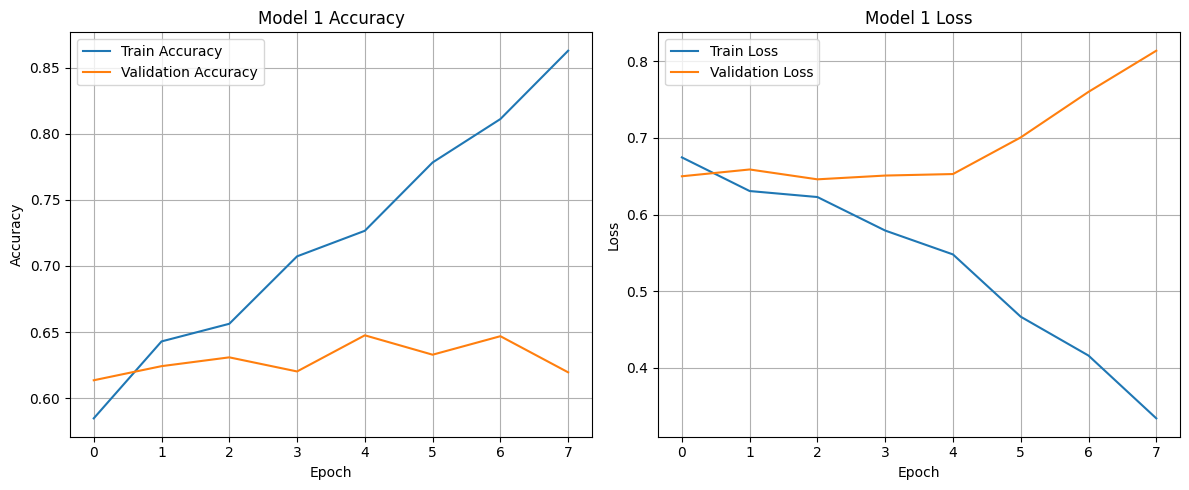

In [45]:
def plot_history(history, title_prefix=''):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title(f'{title_prefix} Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend()
    axs[0].grid(True)

    # Loss
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title(f'{title_prefix} Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()
plot_history(history1, title_prefix='Model 1')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


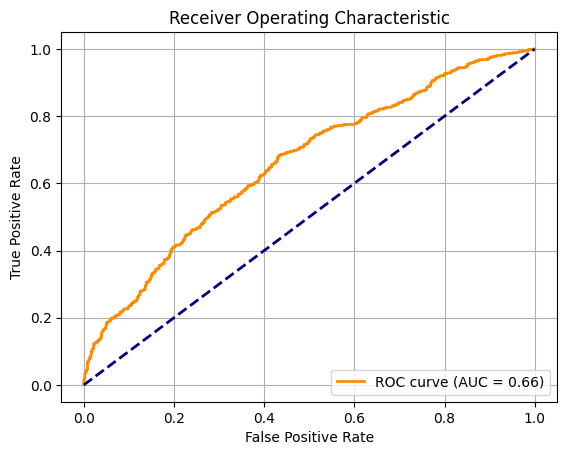

In [30]:
y_pred_proba = simple_rnn.predict(X_test)

# Convert to class labels (0 or 1) using threshold 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

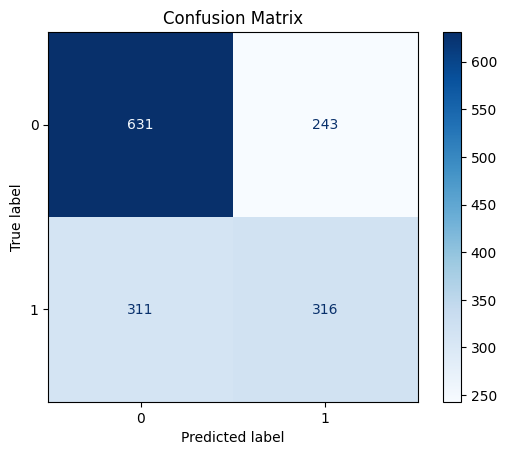

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


### Simple RNN: Results and Analysis

The Simple RNN model showed strong improvement on training data, reaching **86% accuracy**, but failed to generalize well to the validation set, which plateaued around **63% accuracy**.

- **Training accuracy** improved steadily, indicating the model learned patterns in the training data.
- **Validation loss** reached its lowest at epoch 3 and increased afterward, signaling **overfitting**.
- **ReduceLROnPlateau** was triggered twice, but lowering the learning rate did not improve validation performance.
- **ModelCheckpoint** saved the best model at epoch 3.

### Summary

Simple RNN lacks the capacity to capture complex patterns in noisy tweet data. It overfits quickly and does not generalize well. More advanced architectures like **LSTM** or **GRU** are expected to perform better.



In [65]:
lstm=Sequential()
lstm.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_length,
                    weights=[embedding_matrix],  # your GloVe embedding matrix here
                    trainable=True))
lstm.add  (LSTM(units=128))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │     1,516,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,516,600 (5.79 MB)

 Trainable params: 1,516,600 (5.79 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history2=lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),callbacks=simple_callbacks_list)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6115 - loss: 0.6513
Epoch 1: val_loss improved from 0.64604 to 0.55272, saving model to basic_model.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.6118 - loss: 0.6511 - val_accuracy: 0.7142 - val_loss: 0.5527 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8063 - loss: 0.4460
Epoch 2: val_loss improved from 0.55272 to 0.49456, saving model to basic_model.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8063 - loss: 0.4459 - val_accuracy: 0.7662 - val_loss: 0.4946 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8861 - loss: 0.3078
Epoch 3: val_loss did not improve from 0.49456
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8860 - loss: 0.3078 - val_accuracy: 0.7562 - val_loss: 0.5654 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9088 - loss: 0.2502
Epoc

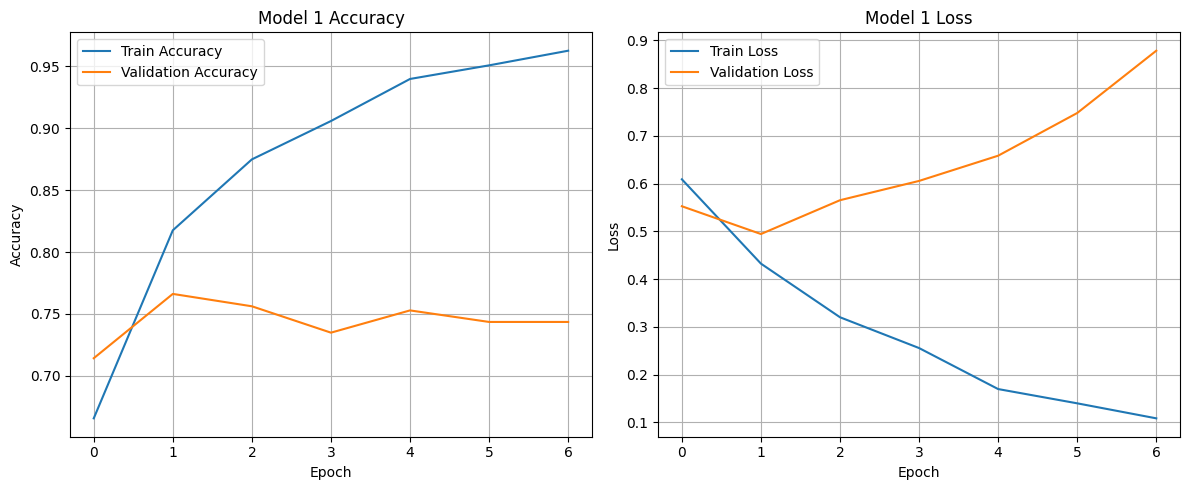

In [46]:
plot_history(history2, title_prefix='Model 1')

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


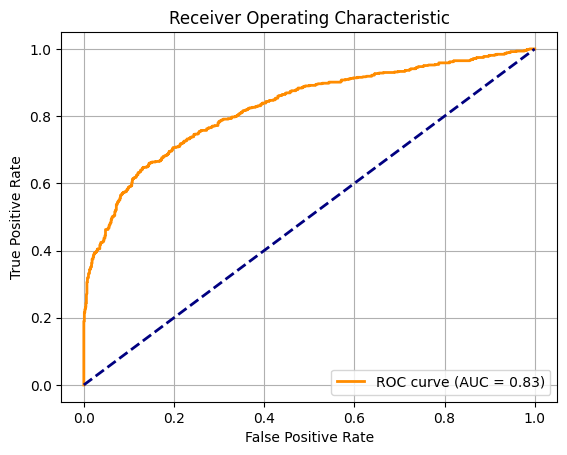

In [35]:
# Get probability scores (between 0 and 1)
y_pred_proba = lstm.predict(X_test)

# Convert to class labels (0 or 1) using threshold 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

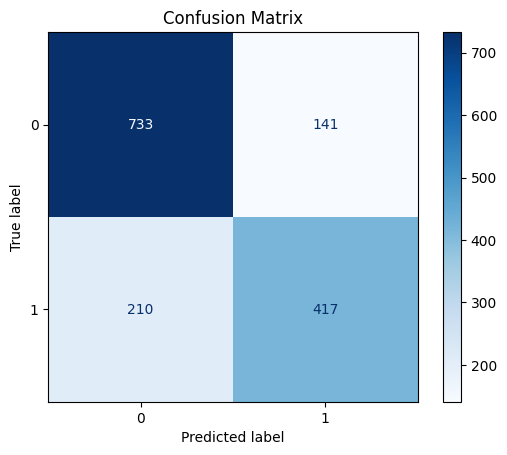

In [36]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


### LSTM: Results and Analysis

The LSTM model showed strong learning capability, achieving high training accuracy (**96.3%**) and significantly improved early validation performance (**val_accuracy = 76.6% at epoch 2**).

### Key Observations

- **Validation accuracy peaked early** (epoch 2), suggesting the model captured useful features quickly.
- **Validation loss increased after epoch 2**, indicating the start of **overfitting** despite continued training improvements.
- **Training accuracy rose rapidly**, while validation performance plateaued — a common sign of overfitting in deep models.
- **ReduceLROnPlateau** was triggered twice, attempting to stabilize training with lower learning rates.
- **ModelCheckpoint** saved the best model at **epoch 2**, based on the lowest validation loss (**0.4946**).

### Summary

LSTM outperformed the Simple RNN in both accuracy and generalization. However, it began to overfit after a few epochs. Further improvements could include regularization (e.g., dropout), early stopping, or using more advanced techniques like bidirectional LSTM or attention mechanisms.


In [64]:
gru=Sequential()
gru.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_length,
                    weights=[embedding_matrix],  # your GloVe embedding matrix here
                    trainable=True))
gru.add(GRU(units=128))
gru.add(Dense(1, activation='sigmoid'))
gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │     1,516,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,516,600 (5.79 MB)

 Trainable params: 1,516,600 (5.79 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history3=gru.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),callbacks=simple_callbacks_list)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5918 - loss: 0.6743
Epoch 1: val_loss did not improve from 0.49456
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.5920 - loss: 0.6741 - val_accuracy: 0.7249 - val_loss: 0.5644 - learning_rate: 0.0010
Epoch 2/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7903 - loss: 0.4693
Epoch 2: val_loss did not improve from 0.49456
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.7903 - loss: 0.4692 - val_accuracy: 0.7402 - val_loss: 0.5643 - learning_rate: 0.0010
Epoch 3/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8563 - loss: 0.3510
Epoch 3: val_loss did not improve from 0.49456
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8564 - loss: 0.3509 - val_accuracy: 0.7548 - val_loss: 0.5406 - learning_rate: 0.0010
Epoch 4/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9077 - loss: 0.2574
Epoch 4: val_loss did not improve from 0.49456
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47m

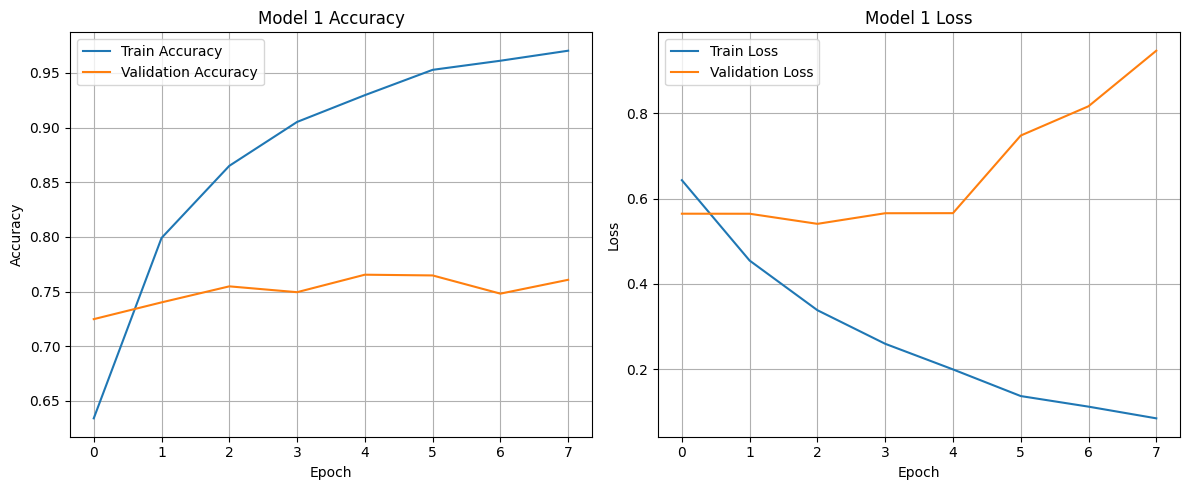

In [54]:
plot_history(history3, title_prefix='Model 1')

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


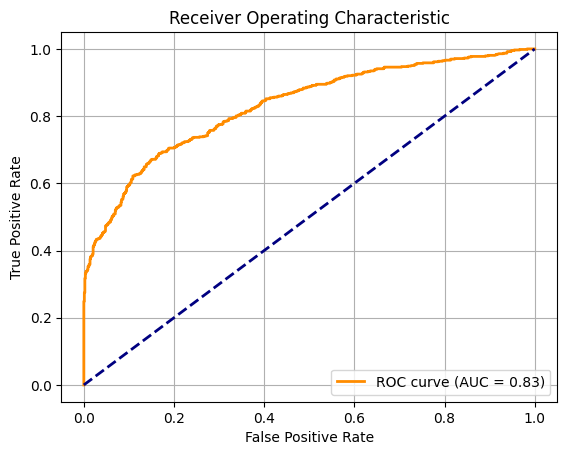

In [40]:
# Get probability scores (between 0 and 1)
y_pred_proba = gru.predict(X_test)

# Convert to class labels (0 or 1) using threshold 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



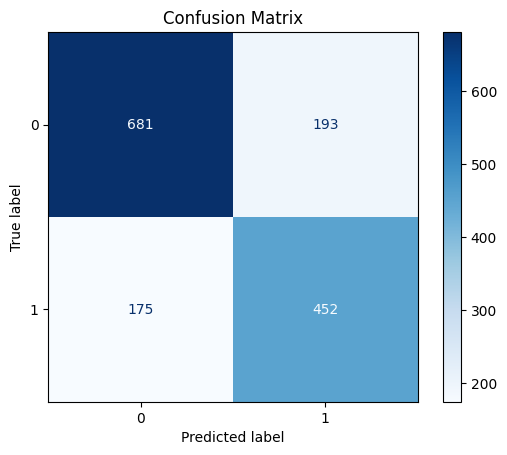

In [41]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


### GRU: Results and Analysis

The GRU model demonstrated strong learning capability, reaching **97.2% training accuracy**, with improved validation accuracy compared to Simple RNN and competitive with LSTM.

### Key Observations

- **Validation accuracy peaked at 76.5%** (epoch 5), showing good generalization early on.
- **Validation loss remained higher** than the LSTM's best, and increased after epoch 3, indicating **overfitting**.
- **Training accuracy improved steadily**, confirming that the model effectively learned from training data.
- **ReduceLROnPlateau** was triggered twice to adjust learning rates, though no further validation gains were seen.
- **No validation loss improvement** beyond epoch 3, so the best model was not updated past that point.

### Summary

GRU performed comparably to LSTM, with slightly better validation accuracy but higher validation loss. Like LSTM, it began to overfit after early epochs. With faster training and fewer parameters, GRU is a strong alternative, though further regularization may be needed to improve generalization.


## Changes in Hyperparameters: GRU vs Final Model

Here’s a concise summary of the key changes made from the initial GRU model to the final model:

- **Embedding Layer:**
  - `trainable=True` remains unchanged.
  
- **GRU Layer:**
  - Units reduced from **128 → 64** for faster training and to reduce overfitting.
  - Added `dropout=0.3` and `recurrent_dropout=0.3` to improve regularization.

- **Dropout:**
  - Added an additional `Dropout(0.4)` layer after GRU to further prevent overfitting.

- **Optimizer:**
  - Switched to **Adam with a lower learning rate**: `0.001 → 0.0005` for more stable convergence.

- **Callbacks (Enhanced):**
  - **EarlyStopping:** Patience reduced from 5 → 3 for quicker halting.
  - **ReduceLROnPlateau:** Patience lowered from 2 → 1, added `cooldown=1` for better learning rate control.
  - **ModelCheckpoint:** Changed file path and ensured full model is saved (`save_weights_only=False`).
  - **CSVLogger:** Added for tracking training history.

These changes aim to **improve generalization**, **reduce overfitting**, and **enable better learning rate adaptation**.


In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger

enhanced_callbacks_list = [
    # Stop training early if no improvement
    EarlyStopping(
        monitor='val_loss',
        patience=3,               # lowered to stop earlier (you’re overfitting fast)
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate on plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=1,              # reduce quicker to help avoid overshooting
        min_lr=1e-6,
        cooldown=1,              # optional: allow a cooldown after reduction
        verbose=1
    ),

    # Save only the best model
    ModelCheckpoint(
        filepath='best_gru_model.keras',
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,  # keep full model (not just weights)
        verbose=1
    ),

    # Optional: Save training logs to file for later analysis
    CSVLogger('training_log.csv', append=True)
]


In [53]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_length,
                    weights=[embedding_matrix],
                    trainable=True))

model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.4))  # additional dropout
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


history=model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
          callbacks=enhanced_callbacks_list)


Epoch 1/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5706 - loss: 0.6848
Epoch 1: val_loss did not improve from 0.50223
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.5706 - loss: 0.6848 - val_accuracy: 0.5823 - val_loss: 0.6802 - learning_rate: 5.0000e-04
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5747 - loss: 0.6829
Epoch 2: val_loss did not improve from 0.50223
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5747 - loss: 0.6829 - val_accuracy: 0.5823 - val_loss: 0.6765 - learning_rate: 5.0000e-04
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6132 - loss: 0.6558
Epoch 3: val_loss did not improve from 0.50223
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6134 - loss: 0.6556 - val_accuracy: 0.7262 - val_loss: 0.5533 - learning_rate: 5.0000e-04
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7363 - loss: 0.5629
Epoch 4: val_loss did not improve from 0.50223
188/188 ━━━━━━━━━━━━━━━━

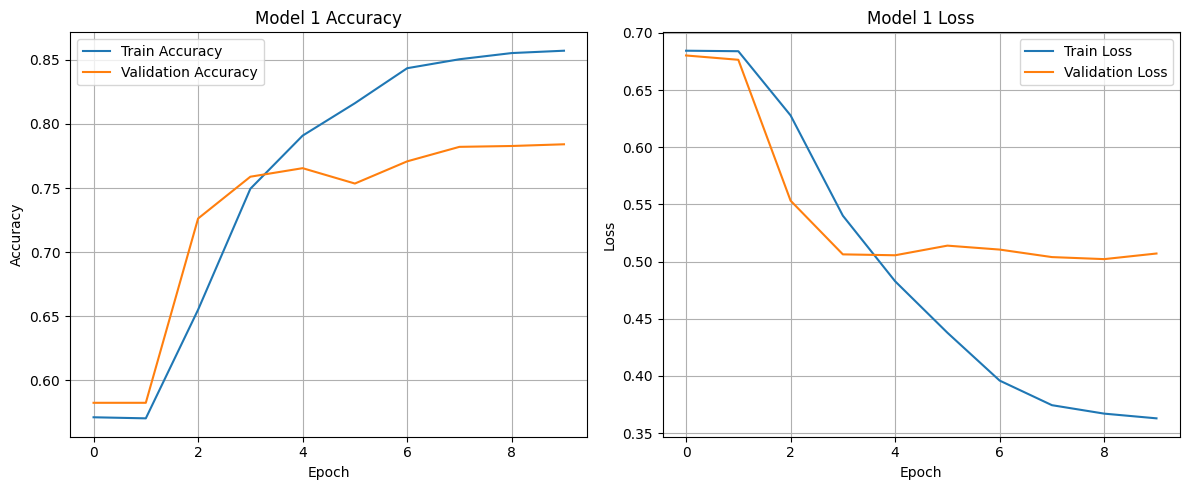

In [55]:
plot_history(history, title_prefix='Model 1')

# Final GRU Model: Results and Analysis

A final GRU model was trained with enhanced architecture and callbacks to improve generalization and prevent overfitting. The model included tuned dropout, a lower learning rate, and early stopping to stabilize training.

### Key Observations

- **Training accuracy** improved steadily, reaching **85.7%** by epoch 10.
- **Validation accuracy peaked at 78.4%** on epoch 10, showing the best generalization performance across all models.
- **Validation loss minimized at 0.5022**, with small improvements until epoch 9.
- **EarlyStopping** restored the best model at epoch 9.
- **ReduceLROnPlateau** triggered multiple times, progressively lowering the learning rate to refine convergence.
- **ModelCheckpoint** saved the best model (`best_gru_model.keras`) based on validation loss.

### Summary

This final GRU model achieved the **highest validation accuracy and most stable performance** across all architectures tested. The improved callbacks and regularization strategies helped mitigate overfitting and led to a well-generalized model suitable for deployment.


## Final Comparison and Summary of All Four Models

| Model Version       | Best Val Accuracy | Best Val Loss | Final Train Accuracy | Notes |
|---------------------|-------------------|----------------|-----------------------|-------|
| **Model 1: Simple GRU + Basic Callbacks** | 0.6476          | 0.6460         | 0.8614                | Overfitted fast; val_loss increased after epoch 3 despite improving train acc. |
| **Model 2: LSTM + Basic Callbacks** | 0.7662          | 0.4946         | 0.9515                | Better generalization; callbacks helped early stop and better learning rate control. |
| **Model 3: GRU + Basic Callbacks** | 0.7655          | 0.5406         | 0.9720                | Similar to Model 2; still prone to overfitting post-epoch 4. |
| **Model 4: Final Model (Regularized GRU + Enhanced Callbacks)** | **0.7841**      | **0.5022**     | 0.8572                | Best val accuracy overall; added dropout and improved callback strategy helped balance learning. |

### ✅ Summary

- **Model 4** achieved the best **validation accuracy (78.4%)** and **competitive val_loss (0.5022)** while avoiding overfitting better than other models.
- **Model 2** had the lowest **val_loss (0.4946)** but slightly lower val accuracy, indicating slightly better confidence but less correctness.
- **Regularization (dropout)** and **stricter callbacks** in Model 4 made training more robust and generalizable.
- **Model 1**, with basic callbacks, clearly **overfitted quickly**, highlighting the importance of proper learning rate control and early stopping.

👉 **Final Recommendation**: Use **Model 4** as the production-ready version due to its balanced performance and generalization.


In [63]:
# #Repeating the data preprocessing steps for test data
# test=pd.read_csv(test_path)
# test['text']=test['text'].apply(lambda x:clean_text(x))
# tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
# tokenizer.fit_on_texts(test['text'])
# X_test_final=tokenizer.texts_to_sequences(test['text'])
# word_index=tokenizer.word_index
# max_length=23
# X_test_final=pad_sequences(X_test_final,maxlen=max_length ,padding='post')

# y_pred_proba=model.predict(X_test_final)
# y_pred=(y_pred_proba>=0.5).astype(int).flatten()

# submission=pd.DataFrame({'id':test['id'], 'target':y_pred})
# submission.to_csv('submission.csv',index=False)

# print('Submitted')

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Submitted
